# Introduction


Superconducting materials - materials that conduct current with
zero resistance - have significant practical applications. Perhaps the
best known application is in the Magnetic Resonance Imaging (MRI)
systems widely employed by health care professionals for detailed internal
body imaging. Other prominent applications include the superconducting
coils used to maintain high magnetic fields in the Large
Hadron Collider at CERN, where the existence of Higgs Boson was recently
confirmed, and the extremely sensitive magnetic field measuring
devices called SQUIDs (Superconducting Quantum Interference
Devices).

Often impractically, a superconductor must be
cooled to extremely low temperatures near or below the boiling temperature
of nitrogen (77 K) before exhibiting the zero resistance property.
(2) The scientific model and theory that predicts Tc is an open
problem which has been baffling the scientific community since the
discovery of superconductivity in 1911 by Heike Kamerlingh Onnes, in
Leiden.

In total, I define and extract 81 features from each
superconductor. I have reduced down the feature to 20 components using PCA.
I tried various statistical models but I eventually settled on two:
A Decision tree regression model and Random Forest model although I have shown the results of Linear regression too.  

**IMPLEMENTATION**

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
print(data.head())

   number_of_elements  mean_atomic_mass  ...  wtd_std_Valence  critical_temp
0                   4         88.944468  ...         0.437059           29.0
1                   5         92.729214  ...         0.468606           26.0
2                   4         88.944468  ...         0.444697           19.0
3                   4         88.944468  ...         0.440952           22.0
4                   4         88.944468  ...         0.428809           23.0

[5 rows x 82 columns]


Necessary imports

# PCA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
features = data.columns.values
# Define the X and Y
X = data.drop(['critical_temp'],axis = 1)
Y = data['critical_temp']
# Splitting the test samples and train samples in 1/4 ratio
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# Data standardisation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
eig_vals = list(map(float,explained_variance))
print(eig_vals)
print(sum(eig_vals[:20]))

[0.38830262422765893, 0.10556711471481368, 0.09489364319017803, 0.07889944353243947, 0.05886966253638392, 0.037983067957244904, 0.03655682847209986, 0.03110078845624235, 0.023494262017528075, 0.01983247810730239, 0.018293339558561227, 0.014556886182926176, 0.011863111052540403, 0.010022775770645132, 0.009906645639272377, 0.007824894108558444, 0.0072724278076983975, 0.005461160842366676, 0.004868197685310056, 0.0038215079624848635, 0.00299735292921337, 0.002863102811263233, 0.002577970547762563, 0.002063313202742411, 0.0019767614179177066, 0.001866564131807814, 0.0016908913029706374, 0.0014460292148684227, 0.00125783745679254, 0.001144709262694833, 0.0010262333441673742, 0.0009653009826019446, 0.0009083327739483147, 0.0007175249495366223, 0.0006798110398194818, 0.0006210145842637002, 0.0005730006925465135, 0.0004962369629209962, 0.0004397641872393941, 0.000422218641364179, 0.0003225951103915178, 0.0003043617243188833, 0.00025749084336528253, 0.0002393494221143547, 0.0002236013326297767,

*We observe that data features are highly corelated ,hence I reduce the features to 20 and still the total accounted variance by these top 20 features is 97 %*

In [13]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# **LINEAR REGRESSION**

In [16]:
X_trainm = np.array(X_train)
X_trainm = np.concatenate([np.ones((X_trainm.shape[0],1)),X_trainm],axis=1)
X_testm = np.array(X_test)
X_testm = np.concatenate([np.ones((X_testm.shape[0],1)),X_testm],axis=1)
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_trainm),X_trainm)),np.transpose(X_trainm)),y_train)
predicted=[]
for i in range(len(X_test)):
    pred = np.matmul(X_testm[i,:],np.transpose(theta))
    predicted.append(pred)
print('ACTUAL Tc',list(y_test[:20]))
print('PREDICTED',predicted[:20])

ACTUAL Tc [92.2, 102.0, 83.0, 32.0, 0.43, 10.4, 50.0, 6.4, 61.0, 69.5, 2.08, 4.3, 46.0, 4.1, 3.3, 13.5, 2.81, 18.4, 0.2, 16.8]
PREDICTED [59.43385085903805, 71.2848457675391, 63.60418740516676, 52.71797731430993, 14.970449175519533, 39.227051386881136, 67.91901544333035, 14.4851197046178, 55.469102596165236, 59.41737812358634, 6.76396483669391, 7.294750284035239, 58.47397843962358, 4.95360057573062, 5.763155224524312, 50.95456056653779, 2.193763120573048, 40.26407417675658, 33.78648017370428, -8.869974325708167]


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


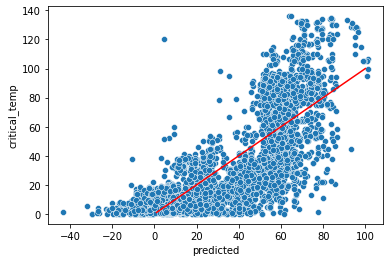

In [23]:
sns.scatterplot(x= predicted,y =y_test)
t = np.linspace(1,100,100)
sns.lineplot(t,t, color='r')
plt.xlabel('predicted')
plt.show()

*It can be well observed that there is wide difference from the true value and predicted as the ideal case should be all points lying on the y=x line*

# Decision Tree regression

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


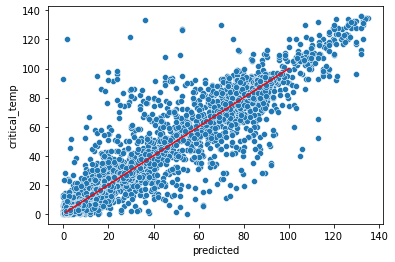

In [26]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
sns.scatterplot(x= y_pred,y =y_test)
t = np.linspace(1,100,100)
sns.lineplot(t,t, color='r')
plt.xlabel('predicted')
plt.show()

*We have a comparable better prediction with the decison tree algorithm although there is still the preservance of noise*

# Random Forest regression

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


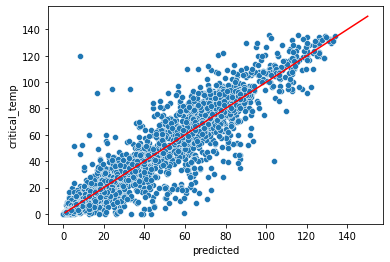

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
sns.scatterplot(x= y_pred,y =y_test)
t = np.linspace(1,150,150)
sns.lineplot(t,t, color='r')
plt.xlabel('predicted')
plt.show()

***We have a much better prediction from random forest algo as we can see the points more close to the y=x line***

# Conclusion

*The temperature prediction doesn't guarantee the material to be a superconductor but if the materialis known to be one based on the training samples the temperature can be very well predicted.*